In [101]:
import pandas as pd
import numpy as np

## READ_CSV()
## https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas-read-csv

### OBTENEMOS TODO EL DATA FRAME A TRAVES DEL LINK

In [102]:
alcohol = pd.read_csv('https://andybek.com/pandas-drinks')

### PODEMOS OBTENER SOLAMENTE COLUMNAS ESPECIFICAS Y PONER UN INDEX ESPECIFICO

In [103]:
pd.read_csv('https://andybek.com/pandas-drinks',usecols=['country','wine_servings'], index_col='country')

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0
...,...
Venezuela,3.0
Vietnam,1.0
Yemen,NaN


### Si del dataframe ponemos solamente una columna a traer, se puede convertir en una serie

In [105]:
alcohol = pd.read_csv('https://andybek.com/pandas-drinks',usecols=['country','wine_servings'], index_col='country').squeeze('columns')
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

## SERIES SIZING WITH .SIZE, .SHAPE AND LEN

### .size, obtenemos el tamaño de la serie
### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.size.html

In [106]:
alcohol.size

193

In [107]:
# .values, obtenemos todos los valores de la columna de la serie
alcohol.values

array([ nan,  54.,  14., 312.,  45.,  45., 221.,  11., 212., 191.,   5.,
        51.,   7.,  nan,  36.,  42., 212.,   8.,  13.,  nan,   8.,   8.,
        35.,  16.,   1.,  94.,   7.,  nan,   7.,  16.,   1.,   4.,   1.,
         1.,   1., 172.,   8.,   3.,   1.,   9.,  74.,  11., 254.,   5.,
       113., 134.,  nan,   1., 278.,   3.,  26.,   9.,   3.,   1.,   2.,
       233.,  nan,  59.,  nan,   1.,  97.,  37.,  59.,   1., 149., 175.,
         1., 218.,  28.,   2.,   2.,  21.,   1.,   1.,   2., 185.,  78.,
        nan,  nan,  nan,  nan, 165.,   9., 237.,   9.,  16.,   1.,  12.,
         2.,   1.,  nan,   6., 123.,  62.,  31.,  nan,   2.,  nan,  56.,
       271.,   4.,   1.,  nan,  nan,   1.,  12.,  nan,  nan,  18.,   5.,
        18.,  nan,   8., 128.,   1.,   5.,  nan,   1.,   8.,  nan,  19.,
       175.,   1.,   1.,   2.,   7., 129.,   1.,  nan,  23.,  18.,   1.,
        74.,  21.,   1.,  56., 339.,   7.,   9.,  18., 167.,  73.,  nan,
        32.,  71.,  11.,  24.,  nan,  14.,  nan,   

In [108]:
# y con .index, obtenemos los indices de la serie
alcohol.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

### .SHAPE
### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shape.html

In [109]:
# .shape,
alcohol.shape

(193,)

In [110]:
alcohol.size == alcohol.shape[0]

True

### IS_MONOTOMIC
### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.is_monotonic_increasing.html
### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.is_monotonic_decreasing.html
#### is_monotomic_increasing, is_monotomic_decreasing. Funciones para saber si van en orden los elementos de la serie

In [174]:
pd.Series(reversed([1,2,3,3,3,3,3,3,10,79,100])).is_monotonic_decreasing

True

In [112]:
# is_unique si todos los valores son unicos
alcohol.head().is_unique

True

In [113]:
# .nunique cuenta los valores unicos de la serie sin los valores null, a no ser que se ponga dropna=False
alcohol.nunique(dropna=False)

72

In [114]:
# count() cuenta los valores que no son nulos
alcohol.head().count()

4

In [115]:
# .isna().sum(): number of null elements
all = alcohol.size
nonnulls = alcohol.count()
nulls = alcohol.isna().sum()

all == nulls + nonnulls


True

In [116]:
# Alternativa a contar valores null
nulls = alcohol[np.isnan].size

all == nulls + nonnulls

True

<Axes: >

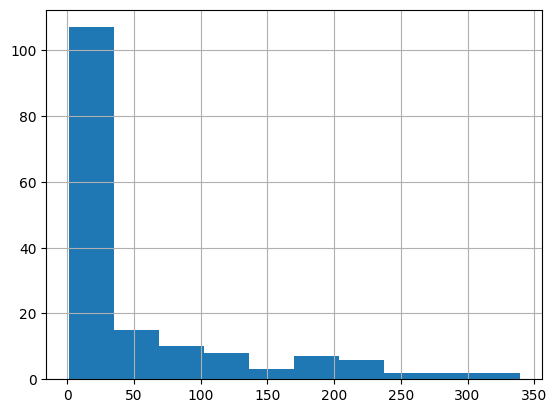

In [117]:
alcohol.hist()

In [118]:
#exercice 1: isolate the non-nulls in the alcohol series and assing them to the variable wine_servings
wine_servings = alcohol.loc[alcohol.notna()]
wine_servings

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [119]:
# 2 : What is the total wine consumed by countries in the wine_servings
wine_servings.sum()

8221.0

In [120]:
# 3 : In the wine_servings dataset, what was the total wine consumed by countries that consumed less than 100 servings?
wine_servings[wine_servings < 100].sum()

2416.0

In [121]:
# .dropna(inplace=TRUE) -> reemplaza la serie original y la sobre escribe
# .dropna(inplace=False) -> valor por defecto, hace una copia de la serie original
wine_servings.dropna(inplace=False)
#alcohol.fillna(-1,inplace=True)

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [122]:
alcohol[-1]

4.0

In [123]:
#una forma de ordenar los valores de mayor a menor, y viceversa, y que te traiga x cantidad de registros
# alcohol.sort_values(ascending=False)[:10]
alcohol.nlargest(10)

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [124]:
# lo mismo pero con los valores minimos
alcohol.nsmallest(29)

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Ghana                       1.0
Guyana                      1.0
Haiti                       1.0
Jordan                      1.0
Kiribati                    1.0
Malawi                      1.0
Mali                        1.0
Morocco                     1.0
Namibia                     1.0
Nicaragua                   1.0
Niger                       1.0
Oman                        1.0
Papua New Guinea            1.0
Philippines                 1.0
Solomon Islands             1.0
Thailand                    1.0
Tanzania                    1.0
Vietnam                     1.0
El Salvador                 2.0
Name: wine_servings, dtype: float64

In [125]:
fifty_plus = alcohol[alcohol < 50]

In [139]:
fifty_plus.nsmallest(20).describe()

count    20.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: wine_servings, dtype: float64

In [138]:
fifty_plus.nsmallest(20).mean()

1.0

In [137]:
fifty_plus.nsmallest(20).std()

0.0

In [136]:
fifty_plus.nsmallest(20).median()

1.0

country
Vanuatu      11.0
Venezuela     3.0
Vietnam       1.0
Name: wine_servings, dtype: float64

Filtering: filter()

In [142]:
alcohol.filter(regex='^V')

country
Vanuatu      11.0
Venezuela     3.0
Vietnam       1.0
Name: wine_servings, dtype: float64

In [147]:
alcohol.filter(like='ela')

country
Belarus       42.0
Iceland       78.0
Ireland      165.0
Venezuela      3.0
Name: wine_servings, dtype: float64

the where() method  -> Replace values where the condition is False.

In [148]:
alcohol.where(lambda x: x > 200).dropna()

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

the mask() method -> Replace values where the condition is True.

In [150]:
alcohol.mask(lambda x: x > 200).dropna()

country
Albania              54.0
Algeria              14.0
Angola               45.0
Antigua & Barbuda    45.0
Armenia              11.0
                     ... 
Vanuatu              11.0
Venezuela             3.0
Vietnam               1.0
Zambia                4.0
Zimbabwe              4.0
Name: wine_servings, Length: 150, dtype: float64

## UPDATE(), GLOBAL TRANSFORMATION
## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.update.html

In [167]:
alcohol.loc['Algeria'] = 19
alcohol.head(10)

country
Afghanistan            NaN
Albania               54.0
Algeria               19.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [173]:
alcohol.update(pd.Series(data=[200,20], index = ['Albania','Algeria']))
alcohol.head(10)

country
Afghanistan      NaN
Albania        200.0
Algeria         20.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

## THE APPLY() METHOD
## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html

In [152]:
alcohol.apply(lambda x: x**2)

country
Afghanistan        NaN
Albania         2916.0
Algeria          196.0
Andorra        97344.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [154]:
alcohol.apply(np.square)

country
Afghanistan        NaN
Albania         2916.0
Algeria          196.0
Andorra        97344.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [156]:
def multiply_by_self_with_min(x, min_servings):
    if x < min_servings:
        return x**2
    return x

In [162]:
alcohol.apply(multiply_by_self_with_min, args=(200,)).head(10)

country
Afghanistan              NaN
Albania               2916.0
Algeria                196.0
Andorra                312.0
Angola                2025.0
Antigua & Barbuda     2025.0
Argentina              221.0
Armenia                121.0
Australia              212.0
Austria              36481.0
Name: wine_servings, dtype: float64

In [161]:
alcohol.apply(multiply_by_self_with_min, min_servings = 200).head(10)

country
Afghanistan              NaN
Albania               2916.0
Algeria                196.0
Andorra                312.0
Angola                2025.0
Antigua & Barbuda     2025.0
Argentina              221.0
Armenia                121.0
Australia              212.0
Austria              36481.0
Name: wine_servings, dtype: float64

## THE MAP() METHOD
## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html